In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [12]:
sn_V06 = {}
sn = {}
sn_nocorona = {}

num_list = [0, 450]
for num in num_list:
    sn_V06[num] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.7_MHG0.25_RC9_V0.6/lvl4/output', 
                             num, combineFiles=True)
    sn[num] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.7_MHG0.25_RC9/lvl4/output', 
                             num, combineFiles=True)
    sn_nocorona[num] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.7/lvl4/output', 
                             num, combineFiles=True)

In [7]:
def get_profile(sn):
    center = np.array([sn.BoxSize, sn.BoxSize, sn.BoxSize])/2.
    mass = sn.part0.mass.value
    pos = sn.part0.pos.value - center
    R = np.linalg.norm(pos[:,:2], axis=1)
    z = sn.part0.pos.value[:,2] - center[2]
    
    Rmin = 0.
    dR = 0.5
    
    ave_R = []
    surf_dens = []
    
    while Rmin < 30:
        key = np.logical_and(R > Rmin, R < Rmin+dR)
        key = np.logical_and(key, np.abs(z) < 3)
        tot_mass = np.sum(mass[key])
        area = np.pi * ((Rmin+dR)**2 - Rmin**2)
        ave_R.append(np.mean(R[key]))
        surf_dens.append(tot_mass/area)
        Rmin += dR
    
    return np.array(ave_R), np.array(surf_dens)

/n/helmod/apps/centos7/Core/Anaconda3/2021.05-jupyterood-fasrc01/x/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/n/helmod/apps/centos7/Core/Anaconda3/2021.05-jupyterood-fasrc01/x/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-13-5372401d130c>:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(R, np.log10(sigma))


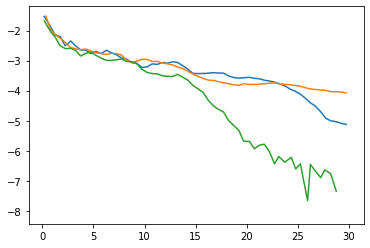

In [13]:
R, sigma = get_profile(sn[450])
plt.plot(R, np.log10(sigma))

R, sigma = get_profile(sn_V06[450])
plt.plot(R, np.log10(sigma))

R, sigma = get_profile(sn_nocorona[450])
plt.plot(R, np.log10(sigma))

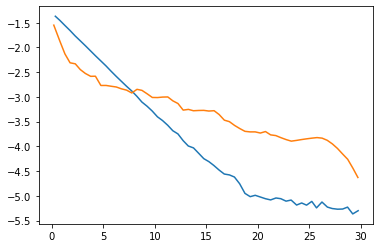

In [10]:
R, sigma = get_profile(sn[0])
plt.plot(R, np.log10(sigma))

R, sigma = get_profile(sn[500])
plt.plot(R, np.log10(sigma))